In [1]:
import os
import time
import subprocess
import json
import cv2

In [2]:
import wolframalpha
import requests
import webbrowser
import wikipedia
import datetime

In [3]:
import speech_recognition as sr
import pyttsx3
from matplotlib import pyplot as plt

In [16]:
assistant_name = "Arakshi"
user_name = "Sneha"

In [5]:
print('Loading your person assistant ' + assistant_name)

Loading your person assistant Arakshi


In [6]:
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty('voice',voices[1].id)

In [7]:
def speak(text):
    print(text)
    engine.say(text)
    engine.runAndWait()

In [8]:
def wishMe():
    hour = datetime.datetime.now().hour
    if hour >= 0 and hour < 12:
        speak('Good Morning ' + user_name)
    elif hour >= 12 and hour <= 18:
        speak('Good Evening ' + user_name)
    else:
        speak('Good night ' + + user_name)

In [9]:
def takeCommand():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("I am Listening...")
        audio = recognizer.listen(source)
        
        try:
            statement = recognizer.recognize_google(audio, language='en-in')
            print(f"user said : {statement}\n")
        except Exception as e:
            speak("Pardon me, can you please repeat?")
            return "None"
        return statement

In [10]:
def clickPicture():
    videoCaptureObject = cv2.VideoCapture(0)
    result = True
    while(result):
        ret,frame = videoCaptureObject.read()
        cv2.imwrite("MyPicture.jpg",frame)
        result = False
    videoCaptureObject.release()
    cv2.destroyAllWindows()
    speak(assistant_name + " clicked your picture :")
    img = cv2.imread('MyPicture.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(gray)
    plt.title('my picture')
    plt.show()

In [17]:
speak("Loading your personal assistant " + assistant_name)
wishMe()

Loading your personal assistant Arakshi
Good Evening Sneha


How can I help you?
I am Listening...
user said : who are you

Hey, my name is Arakshi.
I can do tasks such as opening google, wikipedia and youtube.
Ask me the time or weather or to take a picture of you.
How can I help you?
I am Listening...
user said : Mario

How can I help you?
I am Listening...
user said : who made you

I was built by Sneha
How can I help you?
I am Listening...
user said : what the time now

The time is 17:20:44
How can I help you?
I am Listening...
user said : what's the weather today

Whats the city name?
I am Listening...
user said : Bangalore

{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.52, 'feels_like': 297.24, 'temp_min': 299.26, 'temp_max': 302.15, 'pressure': 1013, 'humidity': 18}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1611661331, 'sys': {'type': 1, 'id': 9205, 'country': 'IN', 'sunri

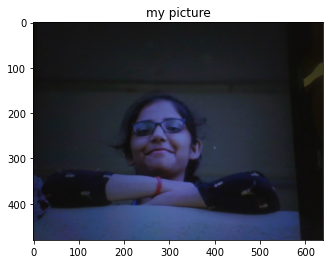

How can I help you?
I am Listening...
user said : bye

Arakshi will see you later. Good bye


In [21]:
if __name__ == '__main__' :
    while True:
        speak("How can I help you?")
        statement = takeCommand().lower()
        if statement == 0:
            continue
            
        if "good bye" in statement or "okay bye" in statement or "stop" in statement or "bye" in statement:
            speak(assistant_name + " will see you later. Good bye")
            break
            
        if "wikipedia" in statement:
            speak("Searching wikipedia...")
            statement = statement.replace("wikipedia"," ")
            results = wikipedia.summary(statement, sentences = 3)
            speak("According to wikipedia...")
            speak(results)
            
        elif "open youtube" in statement:
            speak("Opening Youtube..")
            webbrowser.open_new_tab("https://www.youtube.com")
            time.sleep(5)
            
        elif "open google" in statement:
            speak("Opening Google search..")
            webbrowser.open_new_tab("https://www.google.com")
            time.sleep(5)
            
        elif "open g mail" in statement:
            speak("Opening G mail..")
            webbrowser.open_new_tab("https://www.gmail.com")
            time.sleep(5)
            
        elif "weather" in statement:
            api_key = "886705b4c1182eb1c69f28eb8c520e20"
            base_url = "https://api.openweathermap.org/data/2.5/weather?"
            speak("Whats the city name?")
            city_name = takeCommand()
            complete_url = base_url + "q=" + city_name + "&appid=" + api_key
            response = requests.get(complete_url)
            json_data = response.json()
            if json_data["cod"] != "404" :
                print(json_data)
                weather_data = json_data["main"]
                current_temperature =  weather_data["temp"]
                current_humidity =  weather_data["humidity"]
                x = json_data["weather"]
                weather_description = x[0]["description"]
                speak("The temperature in Kelvin is " + str(current_temperature) + 
                     "\nThe humidity in percentage is " + str(current_humidity) +
                     "\nWeather description is " + str(weather_description))
            else:
                speak("City not found")
                
        elif "time" in statement:
            strTime = datetime.datetime.now().strftime("%H:%M:%S")
            speak(f"The time is {strTime}")
            
        elif "who are you" in statement or "what can you do" in statement:
            speak("Hey, my name is " + assistant_name + ".\n" + 
                 "I can do tasks such as opening google, wikipedia and youtube.\n" +
                 "Ask me the time or weather or to take a picture of you.")
        
        elif "made you" in statement or "created you" in statement or "invented you" in statement:
            speak("I was built by " +  user_name)
            
        elif "open stack overflow" in statement:
            webbrowser.open_new_tab("https://stackoverflow.com/login")
            time.sleep(5)
        
        elif "news" in statement:
            news = webbrowser.open_new_tab("https://timesofindia.indiatimes.com/home/headlines")
            speak("Here are some headlines for the day.")
            time.sleep(5)
            
        elif "search" in statement:
            statement = statement.replace("search"," ")
            webbrowser.open_new_tab(statement)
            time.sleep(5)
            
        elif "ask" in statement or "answer me" in statement:
            speak("I can answer to computational and geographical question too.. Try me.\n" +
                 "What do you want to ask?")
            question = takeCommand()
            app_id = "R2K75H-7ELALHR35X"
            client = wolframalpha.Client(app_id)
            res = client.query(question)
            answer = next(res.results).text
            speak(answer)
            
        elif "log off" in statement or "sign out" in statement or "shut down" in statement:
            speak("Okay, Your PC will shut down in 10 seconds.\n" + 
                 "Make sure you save and have exited from all applications.\n" +
                 "That's good bye from " + assistant_name + ".\n See you.")
            subprocess.call(["shutdown","/1"])
            
        elif "my picture" in statement or "my image" in statement or "camera" in statement or "photo" in statement:
            clickPicture()
            time.sleep(5)
            
        elif "instagram" in statement:
            speak("Please enter your insta username")
            uname = input()
            webbrowser.open_new_tab("https://www.instagram.com/" + uname + "/")
        
    time.sleep(7)